In [1]:
!pip install -q finance-datareader

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,8)
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.rcParams['axes.axisbelow'] = True

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
# S&P500 종목 리스트
import FinanceDataReader as fdr

sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADBE,Adobe Inc.,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders


In [ ]:
len(sp500)

505

In [ ]:
file_path = "/content/gdrive/MyDrive/stockData/"

In [ ]:
stock_list = []
for name in sp500['Symbol']:
    df = pd.DataFrame()
    df = pd.read_csv(file_path + name + ".csv")
    stock_list.append(df)

In [ ]:
sector = set(sp500['Sector'])

In [ ]:
temp = {}

for sec in sector:
    # sp500[sp500['Sector'] == sec]['Symbol']
    temp[sec] = sp500[sp500['Sector'] == sec]['Symbol']

In [ ]:
stock_list[0]

,Date,Close,Open,High,Low,Volume,Change
0,2000-01-03,47.19,48.03,48.25,47.03,2170000.0,-0.0358
1,2000-01-04,45.31,46.44,47.41,45.31,2710000.0,-0.0398
2,2000-01-05,46.62,45.56,48.12,45.56,3700000.0,0.0289
3,2000-01-06,50.38,47.16,51.25,47.16,5980000.0,0.0807
4,2000-01-07,51.38,50.56,51.91,49.97,4100000.0,0.0198
...,...,...,...,...,...,...,...
5275,2020-12-18,176.42,176.76,177.46,175.11,4680000.0,-0.0013
5276,2020-12-21,175.66,173.79,176.09,173.18,1700000.0,-0.0043
5277,2020-12-22,174.78,175.43,175.88,174.24,1380000.0,-0.0050
5278,2020-12-23,173.99,175.21,175.74,173.98,1760000.0,-0.0045


In [ ]:
sector_list = list(set(sp500['Sector']))

In [ ]:
sector_list

['Information Technology',
 'Consumer Discretionary',
 'Energy',
 'Consumer Staples',
 'Financials',
 'Industrials',
 'Utilities',
 'Real Estate',
 'Communication Services',
 'Health Care',
 'Materials']

In [ ]:
for stock in stock_list:
    stock['Date'] = pd.to_datetime(stock['Date'])
    stock = stock.set_index('Date')

In [ ]:
sp500.groupby("Sector").count()

,Symbol,Name,Industry
Sector,,,
Communication Services,26,26,26
Consumer Discretionary,62,62,62
Consumer Staples,32,32,32
Energy,25,25,25
Financials,65,65,65
Health Care,63,63,63
Industrials,73,73,73
Information Technology,73,73,73
Materials,28,28,28


In [ ]:
sp500[sp500['Sector']==sector_list[0]]

,Symbol,Name,Sector,Industry
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
6,ADBE,Adobe Inc.,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
13,AKAM,Akamai Technologies Inc,Information Technology,Internet Services & Infrastructure
38,APH,Amphenol Corp,Information Technology,Electronic Components
...,...,...,...,...
488,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals"
489,WU,Western Union Co,Information Technology,Data Processing & Outsourced Services
497,XRX,Xerox,Information Technology,"Technology Hardware, Storage & Peripherals"
498,XLNX,Xilinx,Information Technology,Semiconductors


In [ ]:
sp500.groupby('Sector').count()

,Symbol,Name,Industry
Sector,,,
Communication Services,26,26,26
Consumer Discretionary,62,62,62
Consumer Staples,32,32,32
Energy,25,25,25
Financials,65,65,65
Health Care,63,63,63
Industrials,73,73,73
Information Technology,73,73,73
Materials,28,28,28


In [ ]:
sectors = dict(list(sp500.groupby('Sector')))

print('count:', len(sectors))
list(sectors.keys())

count: 11


['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [ ]:
cs = sectors['Communication Services']

cs.head()

,Symbol,Name,Sector,Industry
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
22,GOOGL,Alphabet Inc. (Class A),Communication Services,Interactive Media & Services
23,GOOG,Alphabet Inc. (Class C),Communication Services,Interactive Media & Services
52,T,AT&T Inc.,Communication Services,Integrated Telecommunication Services
99,CHTR,Charter Communications,Communication Services,Cable & Satellite


In [ ]:
com_ser = pd.DataFrame()

for i, row in cs.iterrows():
    code, name = row['Symbol'], row['Name']

    df = pd.read_csv(file_path + code + ".csv")
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    b = min_max_scaler(df['Close'])

    com_ser[name] = b


In [ ]:
com_ser.head()

,Activision Blizzard,Alphabet Inc. (Class A),Alphabet Inc. (Class C),AT&T Inc.,Charter Communications,Comcast Corp.,"Discovery, Inc. (Class A)","Discovery, Inc. (Class C)",Dish Network,Electronic Arts,"Facebook, Inc.",Fox Corporation (Class A),Fox Corporation (Class B),Interpublic Group,Live Nation Entertainment,Lumen Technologies,Netflix Inc.,News Corp. Class A,News Corp. Class B,Omnicom Group,T-Mobile US,Take-Two Interactive,"Twitter, Inc.",Verizon Communications,ViacomCBS,The Walt Disney Company
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.009946,NaN,NaN,0.706333,NaN,0.418590,NaN,NaN,0.485220,0.103783,NaN,NaN,NaN,0.976393,NaN,0.895599,NaN,NaN,NaN,0.412188,NaN,0.022443,NaN,0.784106,NaN,0.097940
2000-01-04,0.009504,NaN,NaN,0.636108,NaN,0.369492,NaN,NaN,0.463119,0.082548,NaN,NaN,NaN,0.894995,NaN,0.851345,NaN,NaN,NaN,0.388693,NaN,0.021185,NaN,0.739322,NaN,0.108548
2000-01-05,0.009504,NaN,NaN,0.653728,NaN,0.353756,NaN,NaN,0.461149,0.082476,NaN,NaN,NaN,0.873843,NaN,0.858924,NaN,NaN,NaN,0.369016,NaN,0.020983,NaN,0.784106,NaN,0.116566
2000-01-06,0.009283,NaN,NaN,0.623340,NaN,0.376626,NaN,NaN,0.402872,0.065589,NaN,NaN,NaN,0.876110,NaN,0.846699,NaN,NaN,NaN,0.372687,NaN,0.020581,NaN,0.768315,NaN,0.108548
2000-01-07,0.009614,NaN,NaN,0.632789,NaN,0.357323,NaN,NaN,0.423142,0.069865,NaN,NaN,NaN,0.909160,NaN,0.837653,NaN,NaN,NaN,0.401175,NaN,0.021839,NaN,0.758219,NaN,0.105526


In [ ]:
# com_ser = com_ser.fillna(0)

In [ ]:
com_ser

,Activision Blizzard,Alphabet Inc. (Class A),Alphabet Inc. (Class C),AT&T Inc.,Charter Communications,Comcast Corp.,"Discovery, Inc. (Class A)","Discovery, Inc. (Class C)",Dish Network,Electronic Arts,"Facebook, Inc.",Fox Corporation (Class A),Fox Corporation (Class B),Interpublic Group,Live Nation Entertainment,Lumen Technologies,Netflix Inc.,News Corp. Class A,News Corp. Class B,Omnicom Group,T-Mobile US,Take-Two Interactive,"Twitter, Inc.",Verizon Communications,ViacomCBS,The Walt Disney Company
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.009946,NaN,NaN,0.706333,NaN,0.418590,NaN,NaN,0.485220,0.103783,NaN,NaN,NaN,0.976393,NaN,0.895599,NaN,NaN,NaN,0.412188,NaN,0.022443,NaN,0.784106,NaN,0.097940
2000-01-04,0.009504,NaN,NaN,0.636108,NaN,0.369492,NaN,NaN,0.463119,0.082548,NaN,NaN,NaN,0.894995,NaN,0.851345,NaN,NaN,NaN,0.388693,NaN,0.021185,NaN,0.739322,NaN,0.108548
2000-01-05,0.009504,NaN,NaN,0.653728,NaN,0.353756,NaN,NaN,0.461149,0.082476,NaN,NaN,NaN,0.873843,NaN,0.858924,NaN,NaN,NaN,0.369016,NaN,0.020983,NaN,0.784106,NaN,0.116566
2000-01-06,0.009283,NaN,NaN,0.623340,NaN,0.376626,NaN,NaN,0.402872,0.065589,NaN,NaN,NaN,0.876110,NaN,0.846699,NaN,NaN,NaN,0.372687,NaN,0.020581,NaN,0.768315,NaN,0.108548
2000-01-07,0.009614,NaN,NaN,0.632789,NaN,0.357323,NaN,NaN,0.423142,0.069865,NaN,NaN,NaN,0.909160,NaN,0.837653,NaN,NaN,NaN,0.401175,NaN,0.021839,NaN,0.758219,NaN,0.105526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,0.993480,0.944364,0.927453,0.256895,0.955839,0.832564,0.550537,0.506973,0.311374,0.954196,0.903872,0.370233,0.376238,0.402833,0.963975,0.037653,0.960265,0.362451,0.358683,0.605727,0.985686,1.000000,0.705902,0.958323,0.308941,0.982546
2020-12-21,0.976240,0.949062,0.933707,0.246936,0.959970,0.821444,0.540039,0.494060,0.301239,0.942600,0.891257,0.349767,0.357379,0.393012,0.946982,0.031785,0.950304,0.374308,0.367307,0.589868,0.972242,0.991848,0.685160,0.933213,0.303659,0.968977
2020-12-22,0.982982,0.940983,0.921835,0.231359,0.939103,0.814100,0.536133,0.489928,0.288711,0.931149,0.871340,0.328837,0.338048,0.386213,0.944671,0.028362,0.947463,0.373913,0.367699,0.578855,0.988296,0.992301,0.689713,0.920269,0.304174,0.967497


In [ ]:
com_ser.tail()

,Activision Blizzard,Alphabet Inc. (Class A),Alphabet Inc. (Class C),AT&T Inc.,Charter Communications,Comcast Corp.,"Discovery, Inc. (Class A)","Discovery, Inc. (Class C)",Dish Network,Electronic Arts,"Facebook, Inc.",Fox Corporation (Class A),Fox Corporation (Class B),Interpublic Group,Live Nation Entertainment,Lumen Technologies,Netflix Inc.,News Corp. Class A,News Corp. Class B,Omnicom Group,T-Mobile US,Take-Two Interactive,"Twitter, Inc.",Verizon Communications,ViacomCBS,The Walt Disney Company
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-18,0.993480,0.944364,0.927453,0.256895,0.955839,0.832564,0.550537,0.506973,0.311374,0.954196,0.903872,0.370233,0.376238,0.402833,0.963975,0.037653,0.960265,0.362451,0.358683,0.605727,0.985686,1.000000,0.705902,0.958323,0.308941,0.982546
2020-12-21,0.976240,0.949062,0.933707,0.246936,0.959970,0.821444,0.540039,0.494060,0.301239,0.942600,0.891257,0.349767,0.357379,0.393012,0.946982,0.031785,0.950304,0.374308,0.367307,0.589868,0.972242,0.991848,0.685160,0.933213,0.303659,0.968977
2020-12-22,0.982982,0.940983,0.921835,0.231359,0.939103,0.814100,0.536133,0.489928,0.288711,0.931149,0.871340,0.328837,0.338048,0.386213,0.944671,0.028362,0.947463,0.373913,0.367699,0.578855,0.988296,0.992301,0.689713,0.920269,0.304174,0.967497
2020-12-23,0.991712,0.945496,0.928478,0.240296,0.948838,0.814310,0.561768,0.515496,0.318131,0.946224,0.874904,0.367907,0.374352,0.394901,0.939505,0.031296,0.924359,0.375494,0.366915,0.600734,0.988138,0.992100,0.679427,0.919493,0.317830,0.986617
2020-12-24,1.000000,0.948837,0.933318,0.238764,0.962734,0.821653,0.569336,0.522986,0.319398,0.948398,0.872423,0.377209,0.386139,0.394901,0.939641,0.030318,0.923442,0.381028,0.373971,0.601028,0.993594,0.995522,0.673862,0.916386,0.318346,0.987727


In [ ]:
com_ser.corr()

,Activision Blizzard,Alphabet Inc. (Class A),Alphabet Inc. (Class C),AT&T Inc.,Charter Communications,Comcast Corp.,"Discovery, Inc. (Class A)","Discovery, Inc. (Class C)",Dish Network,Electronic Arts,"Facebook, Inc.",Fox Corporation (Class A),Fox Corporation (Class B),Interpublic Group,Live Nation Entertainment,Lumen Technologies,Netflix Inc.,News Corp. Class A,News Corp. Class B,Omnicom Group,T-Mobile US,Take-Two Interactive,"Twitter, Inc.",Verizon Communications,ViacomCBS,The Walt Disney Company
Activision Blizzard,1.000000,0.957461,0.875791,0.133733,0.914067,0.599825,0.318271,0.098741,0.339671,0.889711,0.941776,-0.735882,-0.725834,0.170141,0.838005,-0.748146,0.929262,-0.528122,-0.510443,0.700132,0.907148,0.933545,-0.187236,0.679234,-0.069565,0.882142
Alphabet Inc. (Class A),0.957461,1.000000,0.999734,0.351804,0.973363,0.662558,0.436814,0.241475,0.331064,0.837458,0.978010,-0.416836,-0.411952,0.792092,0.910922,-0.847763,0.953926,-0.535964,-0.519921,0.698868,0.947183,0.934021,-0.001745,0.861316,0.022660,0.928629
Alphabet Inc. (Class C),0.875791,0.999734,1.000000,-0.392996,0.938356,0.167697,-0.523677,-0.586004,-0.828012,0.844607,0.969378,-0.422577,-0.417750,-0.008936,0.853445,-0.901297,0.950067,-0.185440,-0.139757,-0.431166,0.955039,0.961511,0.160146,0.727711,-0.606026,0.732282
AT&T Inc.,0.133733,0.351804,-0.392996,1.000000,0.239798,0.387297,0.396459,0.648092,0.449231,0.072075,-0.264522,0.612197,0.605471,0.675106,0.244089,0.034944,0.233119,0.003906,-0.003086,0.434838,0.229442,0.043533,-0.550628,0.597260,0.325231,0.278982
Charter Communications,0.914067,0.973363,0.938356,0.239798,1.000000,0.481835,-0.065583,-0.008639,0.134470,0.911061,0.960818,-0.595845,-0.585849,0.693427,0.895912,-0.906448,0.918044,-0.538126,-0.522673,0.513133,0.983715,0.933384,-0.042529,0.805576,-0.349069,0.888833
Comcast Corp.,0.599825,0.662558,0.167697,0.387297,0.481835,1.000000,0.801262,0.814565,0.655135,0.430799,0.018063,0.258809,0.280935,0.316083,0.581324,-0.338719,0.568392,0.066835,0.011963,0.781364,0.524069,0.536891,0.550989,0.803018,0.633840,0.774589
"Discovery, Inc. (Class A)",0.318271,0.436814,-0.523677,0.396459,-0.065583,0.801262,1.000000,0.992463,0.614383,0.081937,-0.656870,0.893855,0.892281,0.630160,0.281422,-0.215870,0.295022,0.373989,0.310969,0.684896,0.147127,0.210874,0.550608,0.714694,0.760989,0.621127
"Discovery, Inc. (Class C)",0.098741,0.241475,-0.586004,0.648092,-0.008639,0.814565,0.992463,1.000000,0.732818,0.104334,-0.650648,0.916486,0.913988,0.603116,0.254912,0.071543,0.087187,0.293516,0.224264,0.702324,0.136478,0.054612,0.490187,0.641370,0.853340,0.489118
Dish Network,0.339671,0.331064,-0.828012,0.449231,0.134470,0.655135,0.614383,0.732818,1.000000,0.317513,-0.341487,0.667615,0.690809,0.359825,0.241357,-0.027481,0.174121,-0.152705,-0.189160,0.777645,0.212594,0.165283,-0.032589,0.547752,0.613452,0.604583
Electronic Arts,0.889711,0.837458,0.844607,0.072075,0.911061,0.430799,0.081937,0.104334,0.317513,1.000000,0.944729,-0.634164,-0.622290,0.190168,0.858744,-0.720589,0.845716,-0.608946,-0.585663,0.614057,0.909829,0.901655,-0.269887,0.548717,-0.134483,0.756305


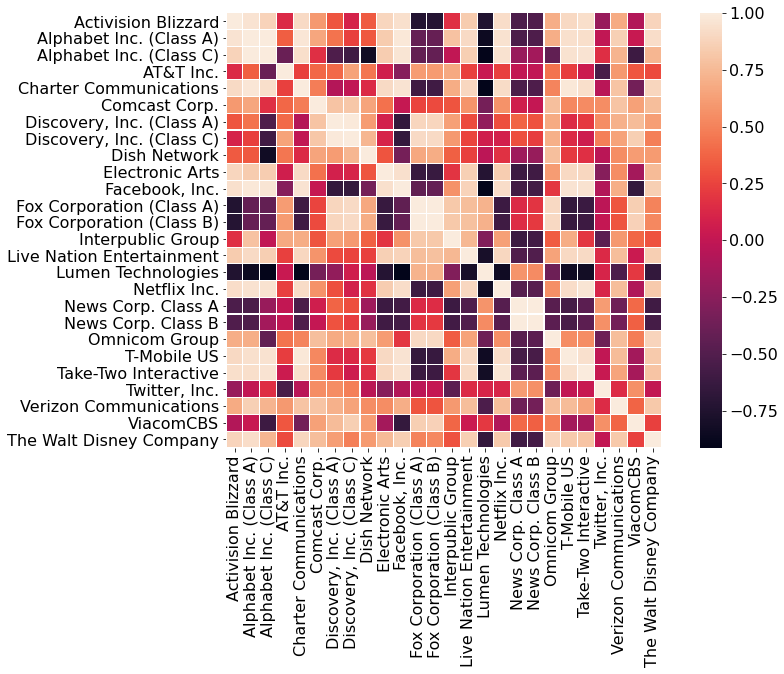

In [ ]:
sns.heatmap(com_ser.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white')

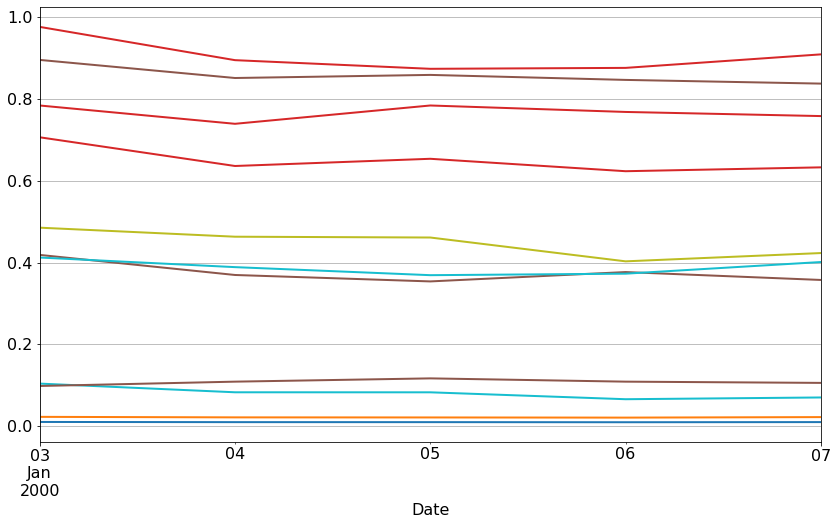

In [ ]:
com_ser[:5].plot(legend=False)

In [ ]:
def min_max_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data ,0)
    return numerator / (denominator + 1e-7)